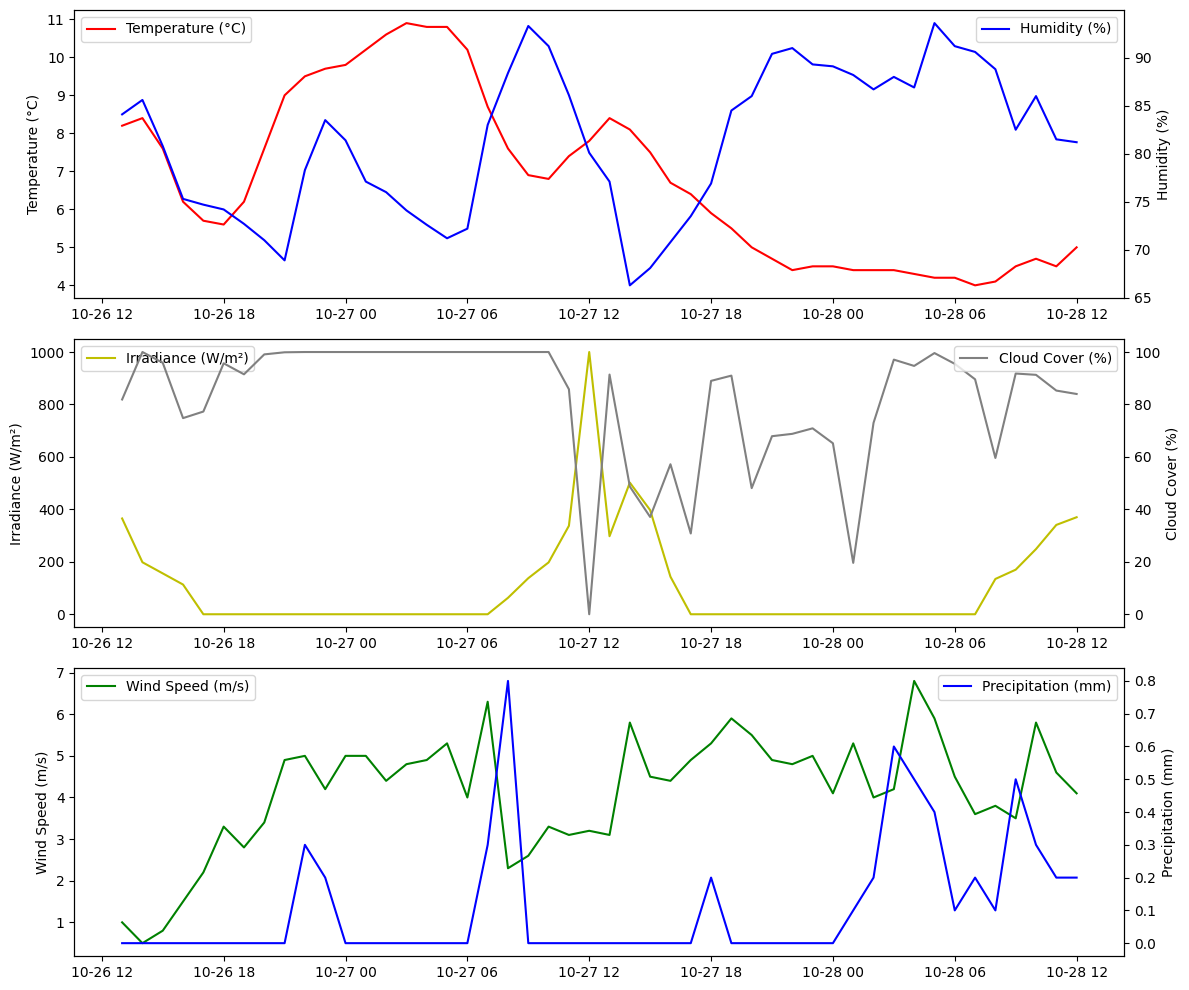


Summary Statistics:
       temperature   irradiance  cloud_cover  wind_speed   humidity  \
count    48.000000    48.000000    48.000000   48.000000  48.000000   
mean      6.802083   107.742140    82.272917    4.127083  81.333333   
std       2.224189   190.681959    23.767148    1.417931   7.568224   
min       4.000000     0.000000     0.000000    0.500000  66.300000   
25%       4.500000     0.000000    72.475000    3.300000  74.575000   
50%       6.550000     0.000000    91.450000    4.400000  82.000000   
75%       8.400000   159.356742   100.000000    5.000000  88.050000   
max      10.900000  1000.000000   100.000000    6.800000  93.600000   

       precipitation     pressure  
count      48.000000    48.000000  
mean        0.108333  1004.670833  
std         0.186608     3.550964  
min         0.000000   999.000000  
25%         0.000000  1001.600000  
50%         0.000000  1004.200000  
75%         0.200000  1007.300000  
max         0.800000  1012.400000  


In [2]:
import sys
sys.path.append('../src')
from weather import WeatherData
import pandas as pd
import matplotlib.pyplot as plt

# Create instance
weather = WeatherData()

# Get forecast for Trondheim
trondheim = (63.4305, 10.3951)
forecast = weather.get_forecast(trondheim, hours=48)

# Convert to pandas for easier analysis
df = pd.DataFrame(forecast)
df.set_index('timestamp', inplace=True)

# Plot key parameters
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))

# Temperature and humidity
ax1.plot(df.index, df['temperature'], 'r-', label='Temperature (°C)')
ax1_twin = ax1.twinx()
ax1_twin.plot(df.index, df['humidity'], 'b-', label='Humidity (%)')
ax1.set_ylabel('Temperature (°C)')
ax1_twin.set_ylabel('Humidity (%)')
ax1.legend(loc='upper left')
ax1_twin.legend(loc='upper right')

# Solar irradiance and cloud cover
ax2.plot(df.index, df['irradiance'], 'y-', label='Irradiance (W/m²)')
ax2_twin = ax2.twinx()
ax2_twin.plot(df.index, df['cloud_cover'], 'gray', label='Cloud Cover (%)')
ax2.set_ylabel('Irradiance (W/m²)')
ax2_twin.set_ylabel('Cloud Cover (%)')
ax2.legend(loc='upper left')
ax2_twin.legend(loc='upper right')

# Wind and precipitation
ax3.plot(df.index, df['wind_speed'], 'g-', label='Wind Speed (m/s)')
ax3_twin = ax3.twinx()
ax3_twin.plot(df.index, df['precipitation'], 'b-', label='Precipitation (mm)')
ax3.set_ylabel('Wind Speed (m/s)')
ax3_twin.set_ylabel('Precipitation (mm)')
ax3.legend(loc='upper left')
ax3_twin.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print(df.describe())